In [1]:
import tensorflow_datasets as tdfs
import tensorflow as tf
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
(train_image,train_label),(test_image,test_label)=tf.keras.datasets.mnist.load_data()


11490434/11490434 [==============================] - 2s 0us/step


In [3]:
print(len(train_image))
print(len(train_label))
print(len(test_image))
print(len(test_label))

60000
60000
10000
10000


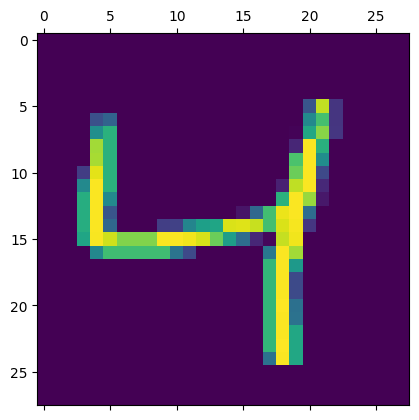

In [4]:
plt.matshow(train_image[2])

In [5]:
print(train_label[2])

4


In [6]:
train_image.shape

(60000, 28, 28)

In [7]:
train=train_image/255
test=test_image/255

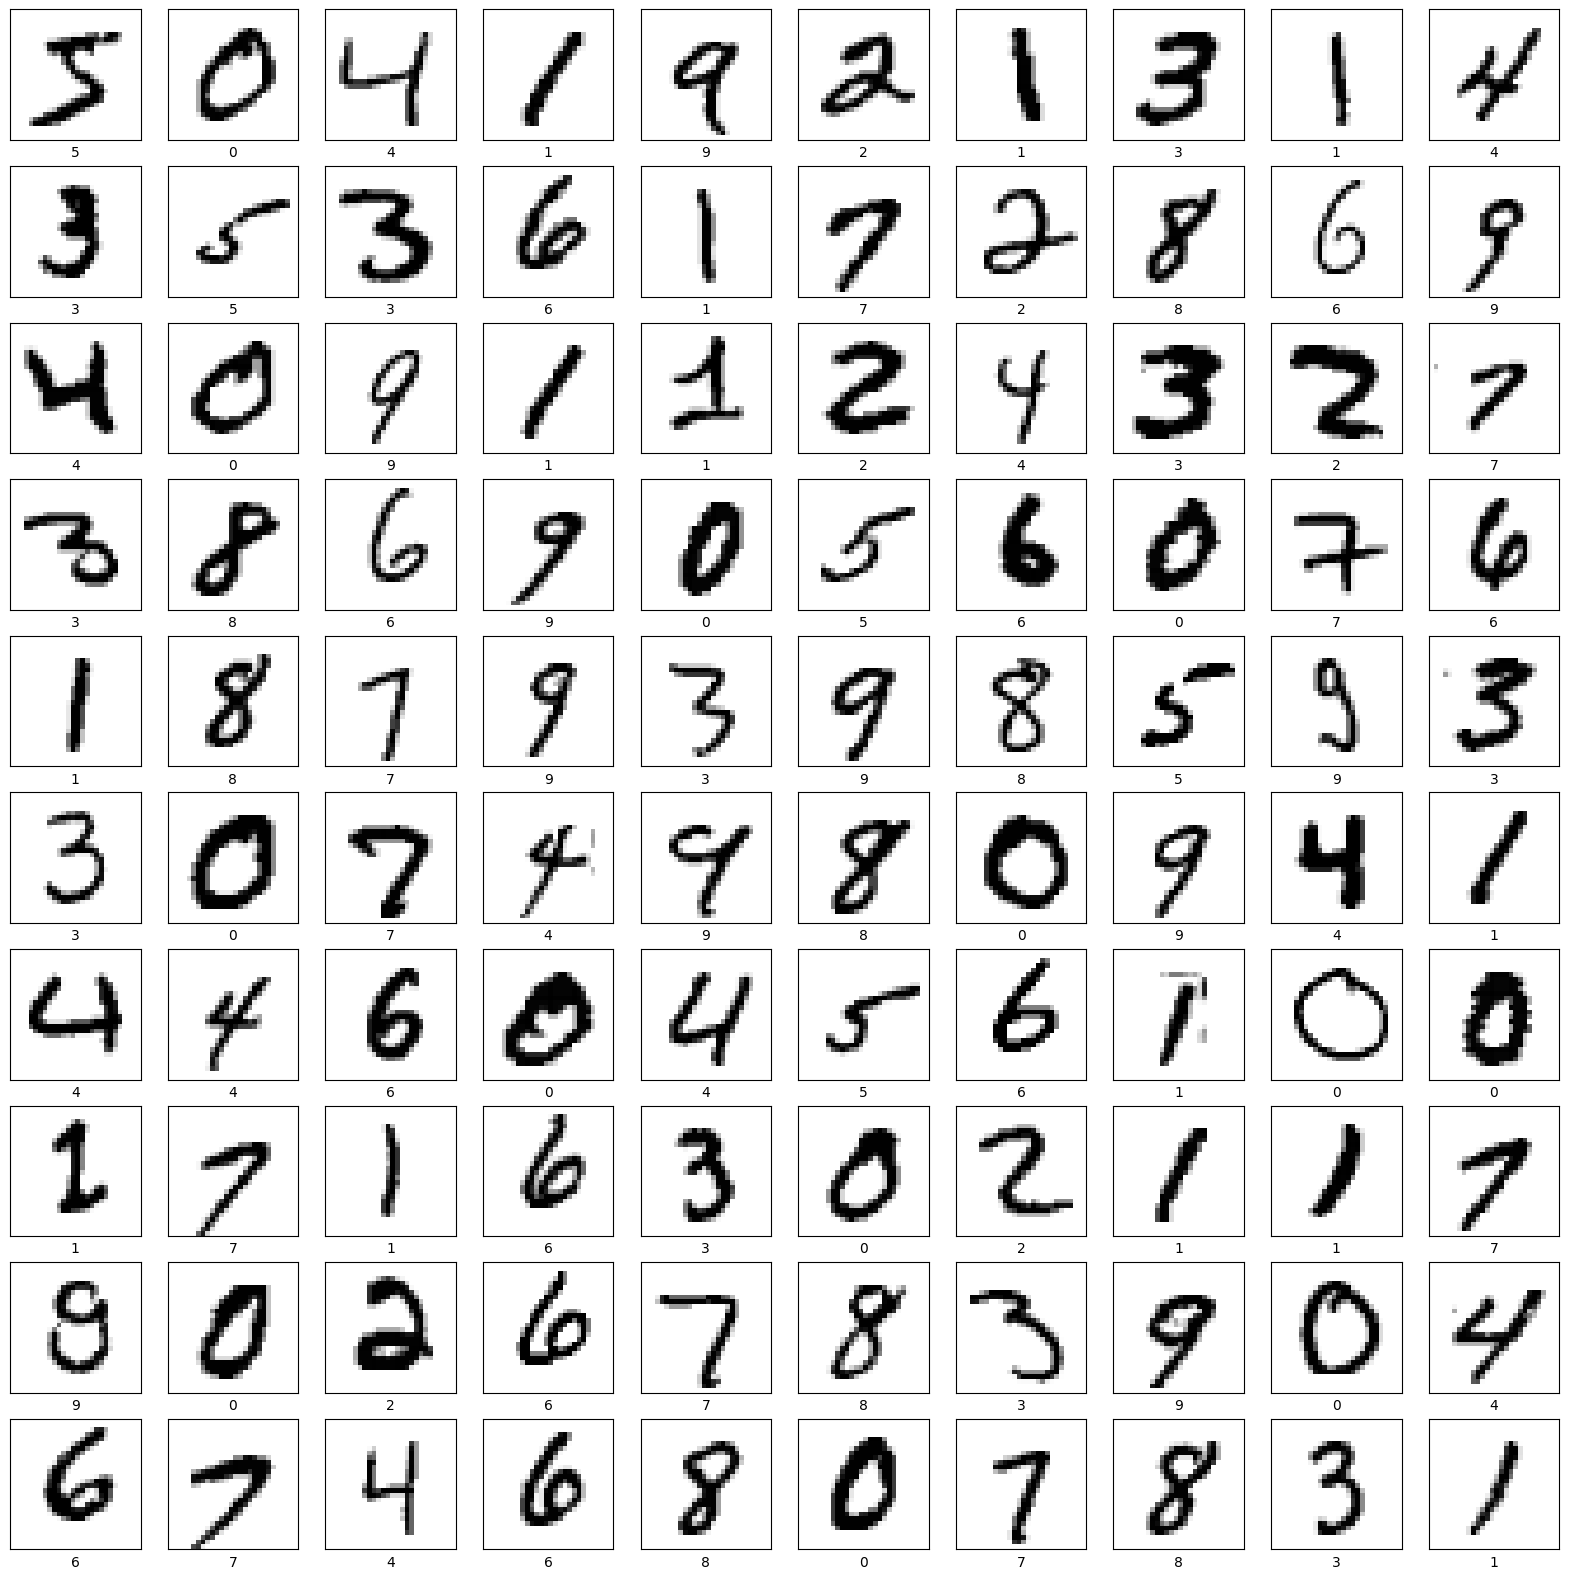

In [8]:
numbers_to_display = 100
num_cells = math.ceil(math.sqrt(numbers_to_display))
plt.figure(figsize=(20,20))
for i in range(numbers_to_display):
    plt.subplot(num_cells, num_cells, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_image[i], cmap=plt.cm.binary)
    plt.xlabel(train_label[i])
plt.show()

In [9]:
model=tf.keras.Sequential ([
    tf.keras.layers.Conv2D(32,(3,3),padding='same',activation=tf.nn.relu,input_shape=(28,28,1)),
    tf.keras.layers.MaxPooling2D((2,2),strides=2),
    tf.keras.layers.Conv2D(64,(3,3),padding='same',activation=tf.nn.relu),
    tf.keras.layers.MaxPooling2D((2,2),strides=2),
    tf.keras.layers.Flatten(input_shape=(28,28,1)),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(10,activation=tf.nn.softmax)
])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 128)               4

In [11]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [12]:
#batch_size=32
#traindata=train.repeat(5)
history=model.fit(train,train_label,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 20s 4ms/step - loss: 0.1223 - accuracy: 0.9629
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0395 - accuracy: 0.9880
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0273 - accuracy: 0.9906
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0182 - accuracy: 0.9938
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0148 - accuracy: 0.9953


In [13]:
test_loss,test_accuracy=model.evaluate(test,test_label)

313/313 [==============================] - 1s 3ms/step - loss: 0.0392 - accuracy: 0.9887


313/313 [==============================] - 1s 3ms/step


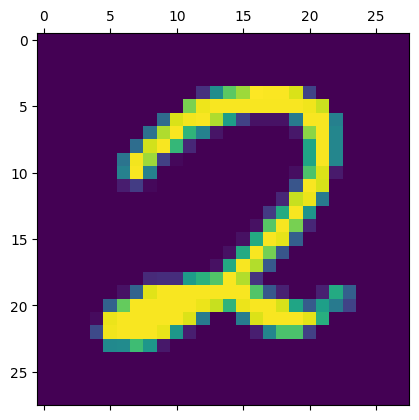

In [27]:
test_prediction=history.model.predict(test)
test_prediction[35]
#print(np.argmax(test_prediction[]))
plt.matshow(test[35])

In [29]:
print("The predicted number is: ",np.argmax(test_prediction[35]))

The predicted number is:  2
